# 기본 모듈

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston, load_iris, load_wine

from sklearn.linear_model import Ridge,Lasso,ElasticNet, LinearRegression, SGDRegressor, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve

from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import math

import mglearn
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

import warnings
warnings.simplefilter('ignore')


# 17. softmax

In [2]:
import numpy as np

In [3]:
def fn(x) :
    print(x / x.sum())

In [5]:
def softmax(x) :
    e = np.exp(x)
    print(e)
    print(e / np.sum(e))

In [7]:
a = np.array([2.0, 1.0, 0.1])
# fn(a)
softmax(a)

[7.3890561  2.71828183 1.10517092]
[0.65900114 0.24243297 0.09856589]


# 18. 다중분류

![iris.png](https://drive.google.com/uc?id=1M-rZSCsgOylvAq82HwPdmn2MikZeDQ9a)

In [9]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [10]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [11]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [12]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [15]:
iris_df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
iris_df['species'] = iris['target']
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [16]:
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


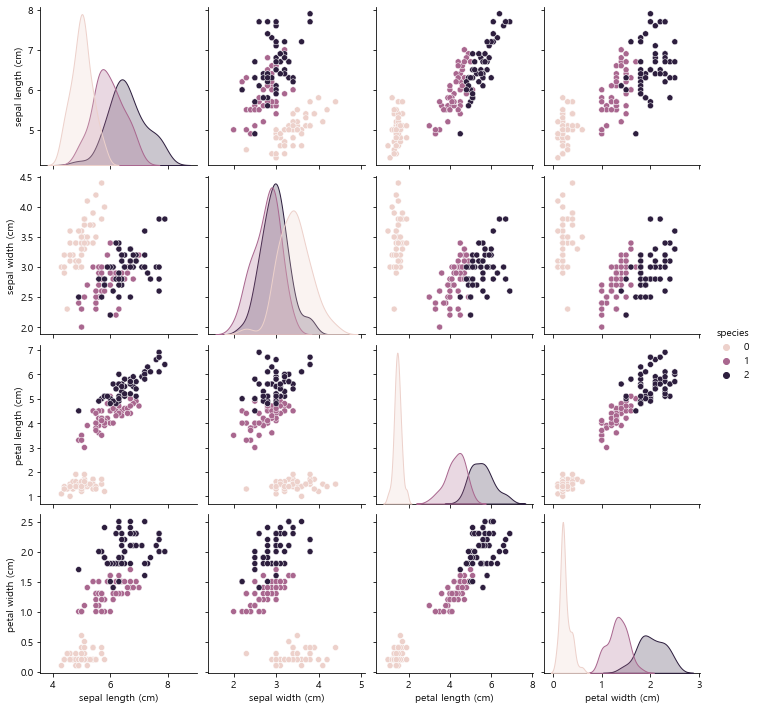

In [18]:
sns.pairplot(iris_df, hue = 'species')
plt.show()

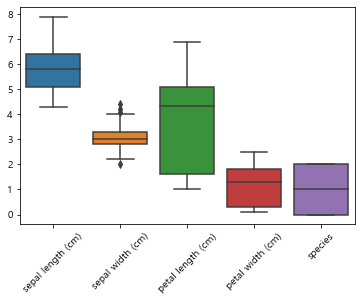

In [22]:
plt.xticks(rotation = 45)
sns.boxplot(data = iris_df)
plt.show()

In [23]:
x_data = iris_df.iloc[:, :-1]
y_data = iris_df.iloc[:, -1]

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, stratify = y_data)

In [28]:
model_logi = LogisticRegression()
model_logi.fit(x_train, y_train)

LogisticRegression()

In [29]:
model_logi.score(x_test, y_test)

0.9666666666666667

In [31]:
model_logi.coef_

array([[-0.38372288,  0.9228183 , -2.37348877, -0.97730602],
       [ 0.54310307, -0.41322471, -0.19668546, -0.90092329],
       [-0.15938019, -0.50959359,  2.57017424,  1.87822931]])

In [32]:
model_logi.intercept_

array([  9.10451512,   2.17432657, -11.27884169])

In [37]:
model_logi.predict_proba([[5.6, 2.9, 3.6, 1.3]])

array([[0.08803609, 0.89699318, 0.01497074]])

In [44]:
model_logi.predict([[5.6, 2.9, 3.6, 1.3]])

array([1])

In [40]:
z = np.matmul( [[5.6, 2.9, 3.6, 1.3]], model_logi.coef_.T) + model_logi.intercept_
z

array([[-0.18321733,  2.13808412, -1.9548668 ]])

In [35]:
model_logi.coef_.T

array([[-0.38372288,  0.54310307, -0.15938019],
       [ 0.9228183 , -0.41322471, -0.50959359],
       [-2.37348877, -0.19668546,  2.57017424],
       [-0.97730602, -0.90092329,  1.87822931]])

In [39]:
def softmax(x) :
    e = np.exp(x)
    return e / np.sum(e)

In [42]:
softmax(z)

array([[0.08803609, 0.89699318, 0.01497074]])

# 연습문제
1. 6.8, 3.0, 5.5, 2.1
각각의 종을 예측

2. confusion matrix 구하고 heatmap을 그리시오

3. f1 score를 구하시오


In [45]:
iris = load_iris()
iris_df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
iris_df['species'] = iris['target']
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [111]:
x_data = iris_df.iloc[:, :-1]
y_data = iris_df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, stratify = y_data)

In [112]:
model_logi = LogisticRegression()
model_logi.fit(x_train, y_train)

LogisticRegression()

In [113]:
model_logi.predict([[6.8, 3.0, 5.5, 2.1], [5.8, 2.8, 5.1, 2.4]])

array([2, 2])

array([[10,  0,  0],
       [ 0,  8,  2],
       [ 0,  0, 10]], dtype=int64)

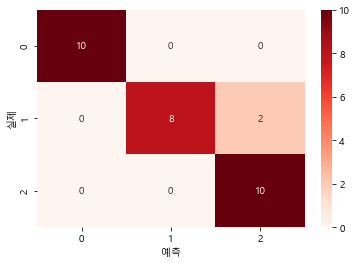

In [114]:
y_pred = model_logi.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
display(cm)

sns.heatmap(cm, annot = True, cmap = 'Reds')
plt.ylabel('실제')
plt.xlabel('예측')
plt.show()

In [59]:
y_pred

array([0, 2, 1, 0, 1, 0, 2, 2, 0, 1, 2, 1, 2, 0, 0, 1, 2, 2, 1, 0, 2, 0,
       1, 2, 1, 2, 1, 1, 0, 0])

In [64]:
y_test = np.array(y_test)

In [69]:
f1_score(y_test, y_pred, average = 'weighted')

0.9333333333333333

# 19. 다중분류 연습문제

In [71]:
from sklearn.datasets import load_iris, load_wine

In [74]:
wine = load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [75]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [76]:
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

1. 상관관계, heatmap
2. train, test score
3. test[0]번째 데이터 예측
4. confusion matrix, heatmap
5. f1 score (train, test)

## 1. 상관관계, heatmap

In [116]:
x_data = pd.DataFrame(wine['data'], columns = wine['feature_names'])
x_data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [115]:
y_data = pd.DataFrame(wine['target'], columns = ['target'])
y_data

,target
0,0
1,0
2,0
3,0
4,0
...,...
173,2
174,2
175,2
176,2


### 상관관계

In [83]:
x_corr = x_data.corr()
x_corr

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


### heatmap

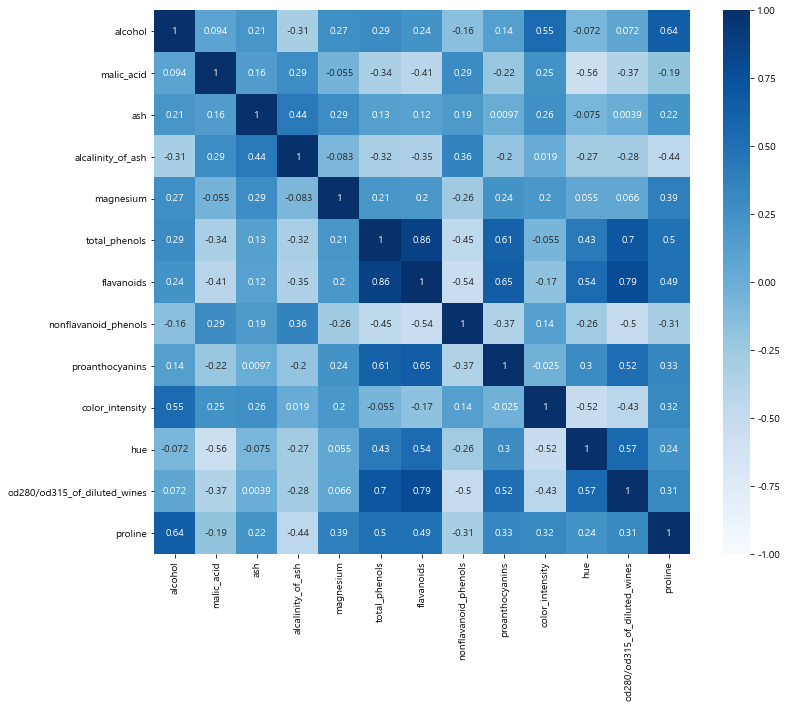

In [85]:
plt.figure(figsize = (12, 10))
sns.heatmap(x_corr, annot = True, cmap = 'Blues', vmin = -1, vmax = 1)
plt.show()

## 2. train, test score

In [117]:
# train, test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, stratify = y_data)

# modeling
model_wine = make_pipeline(StandardScaler(), LogisticRegression())
# param_value = {'logisticregression__C': np.linspace(0,1, 10),
#                'logisticregression__penalty':['l1', 'l2', 'elasticnet', 'none']
#               , 'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
# gridS = GridSearchCV(model_wine, param_grid = param_value,
#                     scoring='f1')
model_wine.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [120]:
print('train :', model_wine.score(x_train, y_train))
print('test :', model_wine.score(x_test, y_test))

train : 1.0
test : 0.9444444444444444


## 3. test[0] 번째 데이터 예측

In [121]:
test0_pred = model_wine.predict([x_test.iloc[0]])

In [122]:
print('예측결과 :', test0_pred == y_test.iloc[0])

예측결과 : target    True
Name: 100, dtype: bool


## 4. confusion matrix, heatmap

In [123]:
y_pred = model_wine.predict(x_test)

In [124]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[12,  0,  0],
       [ 0, 13,  1],
       [ 0,  1,  9]], dtype=int64)

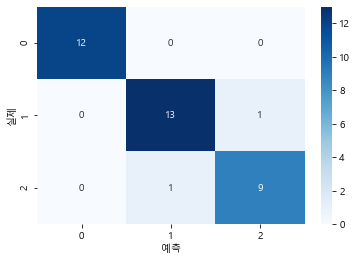

In [125]:
sns.heatmap(cm, annot = True, cmap = 'Blues')
plt.xlabel('예측')
plt.ylabel('실제')
plt.show()

## 5. f1 score(train. test)

In [130]:
print('train f1 score :', f1_score(y_train, model_wine.predict(x_train), average = 'weighted'))
print('test f1 score :', f1_score(y_test, y_pred, average = 'weighted'))

train f1 score : 1.0
test f1 score : 0.9444444444444444
